In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# function to return the square of a complex number

def f(z):
    return np.square(z) - 1

In [4]:
f(0)

-1

In [5]:
z = [4, 1-0.2j, 1.6]
f(z)

array([15.  +0.j , -0.04-0.4j,  1.56+0.j ])

Some values grow, some values shrink, some don’t experience much change.

In [12]:
np.meshgrid(np.arange(0, 10), [1, 2])

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])]

Meshgrid is useful to evaluate functions on a grid. 

In [16]:
# plotting a function using meshgrid

x = np.linspace(-5, 5, 101)
y = np.linspace(-5, 5, 101)

xx, yy = np.meshgrid(x, y) # xx saves multiple coordinates on the x-axis, yy saves coords on the y-axis
zz = np.sqrt(xx**2 + yy**2) # this is the distance to the point from the centre

xx.shape, yy.shape, zz.shape

((101, 101), (101, 101), (101, 101))

In [22]:
# if a function depends on all coordinates, we can use sparse=True to save memory and space

xs, ys = np.meshgrid(x, y, sparse=True)
zs = np.sqrt(xs**2 + ys**2)

np.array_equal(zz, zs)

True

The two arrays are the same

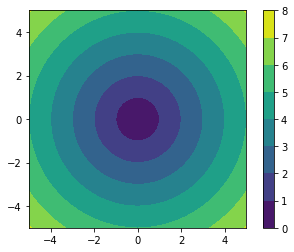

In [27]:
h = plt.contourf(x, y, zs) # to plot filled contours
plt.axis('scaled')
plt.colorbar()
plt.show()

In [32]:
# back to our problem

x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
mesh = x + (1j*y) # creating a mesh of a complex plane

mesh.shape

(20, 20)

In [44]:
print('For element: ', f(mesh[1][1]))
print('Its absolute value: ', np.abs(f(mesh[1][1])))

For element:  (-1+160.11080332409972j)
Its absolute value:  160.11392613101629


Text(0.5, 0.92, 'One iteration: $f(z) = z^2 - 1$')

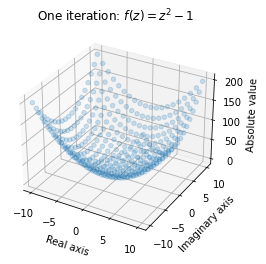

In [40]:
output = np.abs(f(mesh)) # f(mesh) returns the square of the complex number -1
# np.abs - this function returns the absolute value of the function (for plotting)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('One iteration: $f(z) = z^2 - 1$')

Text(0.5, 0.92, 'Two iterations: $f(z) = z^2 - 1$')

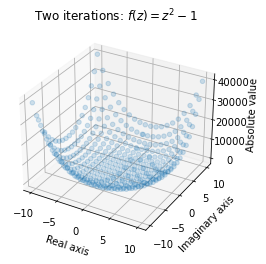

In [45]:
# now running the function 2 times

output = np.abs(f(f(mesh)))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two iterations: $f(z) = z^2 - 1$')

Values around the origin stay small while values with a larger absolute value explode.

In [47]:
# Now consider the following 3 complex numbers:
    
z1 = 0.4 + 0.4j
z2 = z1 + 0.1
z3 = z1 + 0.1j


Given the shape of our first two plots, we would expect that these values would remain near the origin as we apply iterations to them. Let us see what happens when we apply 10 iterations to each value:

In [51]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros((num_iter+1, selected_values.shape[0]), dtype=complex) # creating an empty array of complex nums
outputs[0] = selected_values
outputs

array([[0.4 +0.4j , 0.41+0.4j , 0.4 +0.41j],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  ]])

In [52]:
for i in range(num_iter):
    outputs[i+1] = f(outputs[i]) # Apply the function to the previous line of outputs, repeat 10 times
    
outputs

array([[  0.4        +0.4j       ,   0.41       +0.4j       ,
          0.4        +0.41j      ],
       [ -1.         +0.32j      ,  -0.9919     +0.328j     ,
         -1.0081     +0.328j     ],
       [ -0.1024     -0.64j      ,  -0.12371839 -0.6506864j ,
         -0.09131839 -0.6613136j ],
       [ -1.39911424 +0.131072j  ,  -1.40808655 +0.16100375j,
         -1.42899663 +0.12078019j],
       [  0.94034079 -0.3667694j ,   0.95678553 -0.45341442j,
          1.02744351 -0.34518896j],
       [ -0.250279   -0.68977646j,  -0.29014609 -0.86764072j,
         -0.06351525 -0.70932431j],
       [ -1.41315199 +0.34527312j,  -1.66861566 +0.50348513j,
         -1.49910679 +0.09010582j],
       [  0.87778501 -0.9758468j ,   1.53078095 -1.68024633j,
          1.23920212 -0.27015648j],
       [ -1.18177046 -1.71316738j,  -1.47993742 -5.14417815j,
          0.46263738 -0.66955697j],
       [ -2.53836105 +4.0491412j , -25.27235411+15.22612345j,
         -1.23427319 -0.61952416j]])

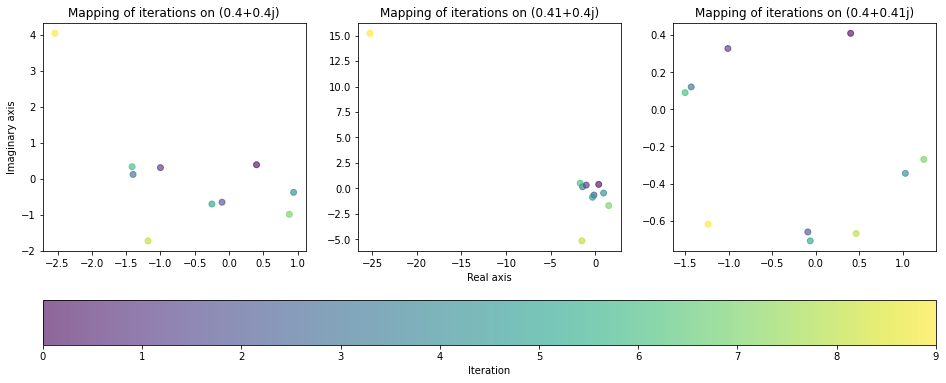

In [54]:
fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))

axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(data.real, data.imag, c=range(data.shape[0]), alpha=0.6)
    ax.set_title(f'Mapping of iterations on {data[0]}')
    
fig.colorbar(cycle, ax=axes, location='bottom', label='Iteration')
plt.show()

To our surprise, the behaviour of the function did not come close to matching our hypothesis. This is a prime example of the chaotic behaviour fractals possess. In the first two plots, the value “exploded” on the last iteration, jumping way beyond the region that it was contained in previously. The third plot on the other hand remained bounded to a small region close to the origin, yielding completely different behaviour despite the tiny change in value.

This leads us to an extremely important question: How many iterations can be applied to each value before they diverge (“explode”)?

As we saw from the first two plots, the further the values were from the origin, the faster they generally exploded. Although the behaviour is uncertain for smaller values (like z1, z2, z3), we can assume that if a value surpasses a certain distance from the origin (say 2) that it is doomed to diverge. We will call this threshold the radius.

This allows us to quantify the behaviour of the function for a particular value without having to perform as many computations. Once the radius is surpassed, we are allowed to stop iterating, which gives us a way of answering the question we posed. If we tally how many computations were applied before divergence, we gain insight into the behaviour of the function that would be hard to keep track of otherwise.

Of course, we can do much better and design a function that performs the procedure on an entire mesh.

In [56]:
def divergence_rate(mesh, num_iter=10, radius=2):
    z = mesh.copy()
    diverge_len = np.zeros(mesh.shape)
    
    for i in range(num_iter):
        conv_mask = np.abs(z) < radius
        diverge_len[conv_mask] += 1
        z[conv_mask] = f(z[conv_mask])
        
    return diverge_len

The behaviour of this function may look confusing at first glance, so it will help to explain some of the notation.

Our goal is to iterate over each value in the mesh and to tally the number of iterations before the value diverges. Since some values will diverge quicker than others, we need a procedure that only iterates over values that have an absolute value that is sufficiently small enough. We also want to stop tallying values once they surpass the radius. For this, we can use Boolean Indexing, a NumPy feature that when paired with universal functions is unbeatable. Boolean Indexing allows for operations to be performed conditionally on a NumPy array without having to resort to looping over and checking for each array value individually.

In our case, we use a loop to apply iterations to our function f(z)=z2−1 and keep tally. Using Boolean indexing, we only apply the iterations to values that have an absolute value less than 2.

With that out of the way, we can go about plotting our first fractal! We will use the imshow function to create a colour-coded visualization of the tallies.

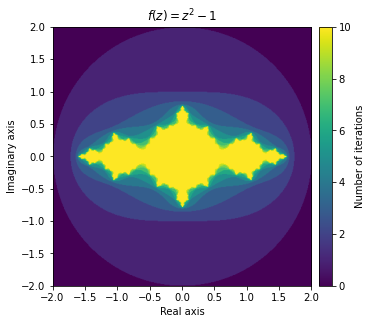

In [57]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j*y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2 -1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');